In [6]:
import librosa
from librosa import power_to_db
from librosa.feature import melspectrogram
import python_speech_features
import matplotlib.pyplot as plt
import os 
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [16]:
TRAIN_DATA = r'C:\Users\ander\Documents\common-voice-dev\accent\train_data'
ACCENT = os.listdir(TRAIN_DATA)
DIR = os.path.join(TRAIN_DATA, ACCENT[1])

In [19]:
npy_file = os.listdir(DIR)[1]

In [3]:
CLIPS_DIR = r"C:\Users\ander\Documents\cv-corpus-5.1-2020-06-22\en\clips"
test_clip_100014 = 'common_voice_en_21137887.mp3'

In [3]:
def envelope(*, y: int, signal_rate: object, threshold: object):
    signal_clean = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(
        window=int(signal_rate / 1000), min_periods=1, center=True
    ).mean()

    for mean in y_mean:
        if mean > threshold:
            signal_clean.append(True)
        else:
            signal_clean.append(False)
    return signal_clean

def remove_silence(*, signal, sample_rate, threshold):
    """
    strip out dead audio space
    :param signal: Audio sample signal
    :param sample_rate: Audio Sample rate
    :param threshold: silence threshold
    :return:

    """

    signal = signal[np.abs(signal) > threshold]
    wrap = envelope(y=signal, signal_rate=sample_rate, threshold=threshold)
    signal = signal[wrap]
    return signal

## Librosa 

In [4]:
## Librosa test 
signal, sample_rate = librosa.load(os.path.join(CLIPS_DIR, test_clip_100014),sr = 22050)

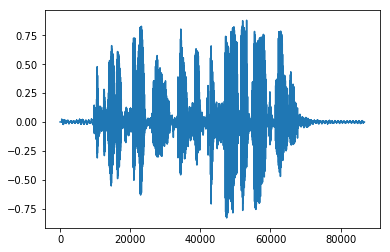

In [24]:
plt.plot(signal)
plt.show()

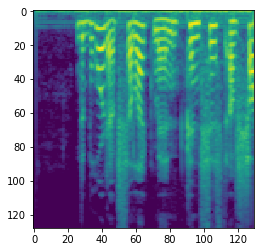

In [13]:
mel = melspectrogram(y=signal[0:sample_rate*3], sr=sample_rate,n_mels=128 , fmax= 8000)
spec_to_db = power_to_db(mel, ref=np.max, )
plt.imshow(spec_to_db)
plt.show()

In [17]:
## Remove silence
updated_signal = remove_silence(signal= signal, sample_rate=sample_rate, threshold=0.01)

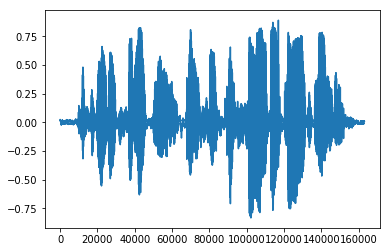

In [11]:
plt.plot(updated_signal)
plt.show()

In [37]:
mel = melspectrogram(y=updated_signal[0:sample_rate], sr=sample_rate, n_fft=1103)
spec_to_db = power_to_db(mel, ref=np.max)
spec_to_db.T.shape

(44, 128)

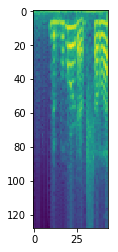

In [20]:
plt.imshow(spec_to_db)
plt.show()

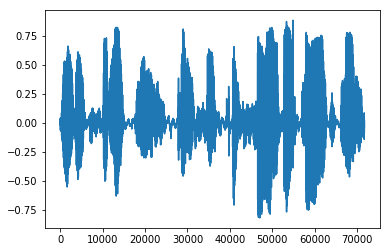

In [19]:
signal_t, _ = librosa.effects.trim(signal, top_db=10)
mel = melspectrogram(y=signal_t[0:sample_rate*2], sr=sample_rate)
spec_to_db = power_to_db(mel, ref=np.max)

plt.plot(signal_t)
plt.show()

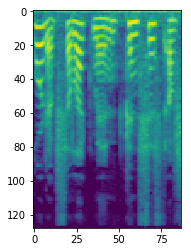

In [20]:
plt.imshow(spec_to_db)
plt.show()

In [22]:
spec_to_db.shape

(128, 87)

In [69]:
spec_to_db.shape

(128, 141)

## Pydub 

In [21]:
from pydub import AudioSegment
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank

In [11]:
audio_mp3 = AudioSegment.from_mp3(file=os.path.join(CLIPS_DIR, test_clip_100014), )
signal = np.array(audio_mp3.normalize().get_array_of_samples(), dtype="int32") / 100000

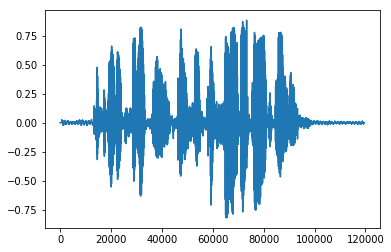

In [50]:
plt.plot(signal)
plt.show()

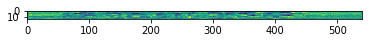

In [27]:
python_speech_feature_mfcc = mfcc(signal, samplerate=22050, nfft=2048, )

d_mfcc_feat = delta(python_speech_feature_mfcc, 2)
fbank_feat = logfbank(signal)

plt.imshow(python_speech_feature_mfcc.T)
plt.show()

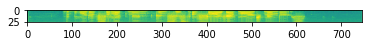

In [52]:
plt.imshow(fbank_feat.T)
plt.show()

In [53]:
remove_silence(signal= signal, sample_rate=sample_rate, threshold=0.01)

array([0.01714929, 0.02401534, 0.02161916, ..., 0.01009859, 0.01033276,
       0.01006621], dtype=float32)

In [38]:
def calc_fft(*, y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1 / rate)
    Y = abs(np.fft.rfft(y) / n)

    return Y, freq

In [41]:
fft =  calc_fft(y=signal, rate=sample_rate)

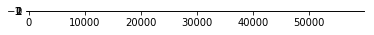

In [44]:
plt.imshow(fft)
plt.show()